# Load in data

In [143]:
import pandas as pd
import numpy as np

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

In [3]:
# load in data, converters turns str dtype -> list
df = pd.read_csv('../data/train_cleaned.csv', converters={'cleaned': pd.eval}, index_col='Unnamed: 0')

# join lists as single string
df['words'] = df.cleaned.apply(lambda x: " ".join(x))
df.head(2)

,cleaned,class,words
0,"[catheterization, laboratory, event, hospital,...",4,catheterization laboratory event hospital outc...
1,"[renal, abscess, child, three, renal, abscess,...",5,renal abscess child three renal abscess child ...


# fit_score function

In [14]:
def fit_score(estimator, vectorizer, dataframe=df, random_state=0, lsa=False, lsa_components=5):
    '''
    
    Prints the model type, vectorizer type, as well as train and test accuracy. 
    Also printsa classification report and plots a confusion matrix on the test data.
    
    Parameters:
    estimator - sklearn estimator
    vectorizer - sklearn word vectorizer
    dataframe - df containing cleaned dataset
    random_state - random state to be used
    lsa - whether or not to apply Latent Semantic Analysis to reduce dimensionality
    lsa_components - n_components hyperparameter for LSA
    
    Returns:
    estimator - fitted sklearn estimator
    
    '''
    
    # vectorize
    if lsa==True:
        svd=TruncatedSVD(n_components=lsa_components, random_state=0)
        X = svd.fit_transform(vectorizer.fit_transform(dataframe.words))
    else:
        X = vectorizer.fit_transform(dataframe.words)
            
    # target
    y = df['class']
    
    # 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # fit model
    estimator.fit(X_train, y_train)
    
    # training acc, testing acc
    train_acc, test_acc = estimator.score(X_train, y_train), estimator.score(X_test, y_test)
    
    print(f'Model: {estimator}')
    print(f'Vectorizer: {vectorizer}')
    print(f'Train accuracy: {train_acc*100:.1f}%')
    print(f'Test accuracy: {test_acc*100:.1f}%')
    
    print('\n\nClassification Report (Test Data):')
    print(classification_report(y_test, estimator.predict(X_test)))
    
    cm = ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
    cm.ax_.set_title('Conf Matrix on Test Data')

# Ensemble Models

## Decision Tree Models

### Count Vectorizer

Model: DecisionTreeClassifier(max_depth=8)
Vectorizer: CountVectorizer()
Train accuracy: 54.8%
Test accuracy: 51.9%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.70      0.68      0.69       653
           2       0.29      0.03      0.05       294
           3       0.23      0.01      0.02       393
           4       0.66      0.57      0.61       585
           5       0.42      0.74      0.53       963

    accuracy                           0.52      2888
   macro avg       0.46      0.41      0.38      2888
weighted avg       0.49      0.52      0.47      2888



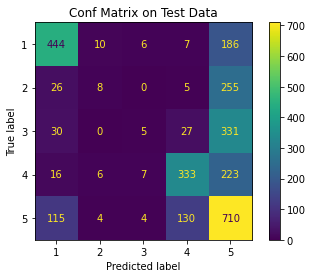

In [61]:
fit_score(DecisionTreeClassifier(max_depth=8), CountVectorizer())

### TF-IDF Vectorizer

Model: DecisionTreeClassifier(max_depth=7)
Vectorizer: TfidfVectorizer()
Train accuracy: 53.8%
Test accuracy: 52.0%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.71      0.69      0.70       653
           2       0.32      0.02      0.04       294
           3       0.32      0.02      0.03       393
           4       0.71      0.49      0.58       585
           5       0.42      0.78      0.54       963

    accuracy                           0.52      2888
   macro avg       0.49      0.40      0.38      2888
weighted avg       0.52      0.52      0.47      2888



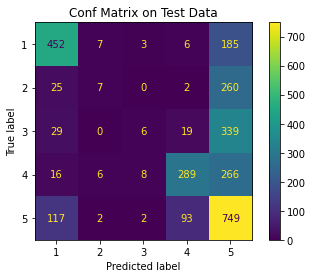

In [57]:
fit_score(DecisionTreeClassifier(max_depth=7), TfidfVectorizer())

## Random Forest Models

### Count Vectorizer

Model: RandomForestClassifier(max_depth=15)
Vectorizer: CountVectorizer()
Train accuracy: 53.7%
Test accuracy: 46.9%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.71      0.50      0.59       653
           2       0.00      0.00      0.00       294
           3       0.00      0.00      0.00       393
           4       0.69      0.41      0.51       585
           5       0.38      0.82      0.52       963

    accuracy                           0.47      2888
   macro avg       0.36      0.35      0.32      2888
weighted avg       0.43      0.47      0.41      2888



/Users/tristantrechsel/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tristantrechsel/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tristantrechsel/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

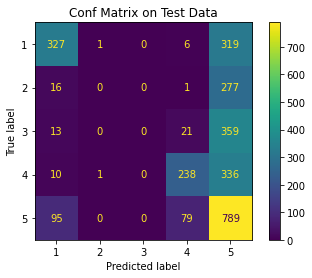

In [36]:
fit_score(RandomForestClassifier(max_depth=), CountVectorizer())

### TF-IDF Vectorizer

Model: RandomForestClassifier(max_depth=12)
Vectorizer: TfidfVectorizer(max_features=500)
Train accuracy: 58.4%
Test accuracy: 52.3%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.70      0.72      0.71       653
           2       0.00      0.00      0.00       294
           3       0.14      0.00      0.01       393
           4       0.66      0.59      0.62       585
           5       0.41      0.72      0.52       963

    accuracy                           0.52      2888
   macro avg       0.38      0.41      0.37      2888
weighted avg       0.45      0.52      0.46      2888



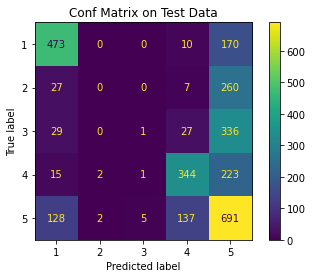

In [99]:
fit_score(RandomForestClassifier(max_depth=12), TfidfVectorizer(max_features=500))

Model: ExtraTreesClassifier(bootstrap=True, max_depth=25, max_samples=0.3, n_jobs=-1)
Vectorizer: TfidfVectorizer(max_features=750)
Train accuracy: 61.9%
Test accuracy: 50.7%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.70      0.66      0.68       653
           2       0.46      0.04      0.08       294
           3       0.29      0.03      0.05       393
           4       0.65      0.57      0.61       585
           5       0.40      0.71      0.51       963

    accuracy                           0.51      2888
   macro avg       0.50      0.40      0.38      2888
weighted avg       0.51      0.51      0.46      2888



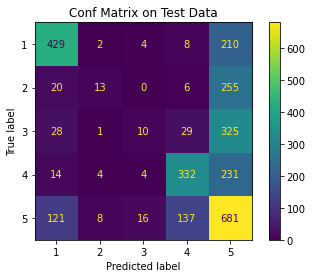

In [120]:
fit_score(ExtraTreesClassifier(n_jobs=-1, max_depth=25, bootstrap=True, max_samples=0.3),\
          TfidfVectorizer(max_features=750))

## Bagging Models

### Count Vectorizer

Model: BaggingClassifier(n_estimators=25, n_jobs=-1)
Vectorizer: CountVectorizer()
Train accuracy: 82.0%
Test accuracy: 47.1%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.63      0.66      0.64       653
           2       0.42      0.39      0.40       294
           3       0.38      0.32      0.35       393
           4       0.54      0.59      0.56       585
           5       0.36      0.36      0.36       963

    accuracy                           0.47      2888
   macro avg       0.47      0.46      0.46      2888
weighted avg       0.47      0.47      0.47      2888



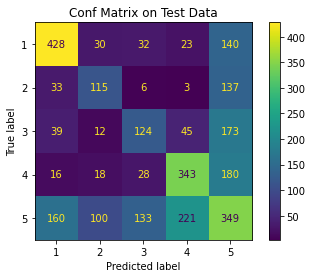

In [75]:
fit_score(BaggingClassifier(n_jobs=-1), CountVectorizer())

### TF-IDF Vectorizer

Model: BaggingClassifier(n_jobs=-1)
Vectorizer: TfidfVectorizer(max_features=1000)
Train accuracy: 81.3%
Test accuracy: 45.3%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.63      0.63      0.63       653
           2       0.41      0.36      0.38       294
           3       0.32      0.30      0.31       393
           4       0.54      0.57      0.56       585
           5       0.34      0.35      0.34       963

    accuracy                           0.45      2888
   macro avg       0.45      0.44      0.44      2888
weighted avg       0.45      0.45      0.45      2888



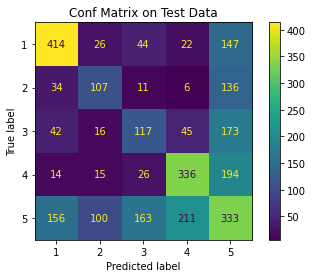

In [79]:
fit_score(BaggingClassifier(n_jobs=-1), TfidfVectorizer(max_features=1000))

## Stacking Classifiers

### Count Vectorizer

In [ ]:
fit_score(RandomForestClassifier(), CountVectorizer())

### TF-IDF Vectorizer

In [ ]:
fit_score(RandomForestClassifier(), TfidfVectorizer())

In [ ]:
fit_score(RandomForestClassifier(), TfidfVectorizer())

### Stacker

In [122]:
vec = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lsa', TruncatedSVD(n_components=100))
])

sr = StackingRegressor(estimators=[
    ('lr', LogisticRegression(max_iter=500)),
    ('knn', KNeighborsClassifier(n_neighbors=20)),
    ('dt', DecisionTreeClassifier(max_depth=7))
])

sr_pipe = Pipeline([
    ('vec', vec),
    ('sr', sr)
])

NameError: name 'Pipeline' is not defined

In [144]:
sr = StackingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('knn', KNeighborsClassifier(n_neighbors=25)),
    ('dt', DecisionTreeClassifier(max_depth=25)),
    ('xgb', XGBClassifier())
])

/Users/tristantrechsel/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('knn', KNeighborsClassifier(n_neighbors=25)),
                               ('dt', DecisionTreeClassifier(max_depth=25)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                            

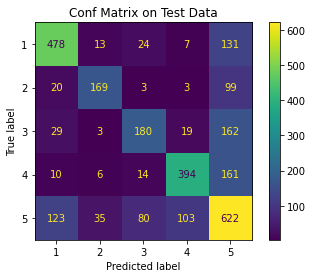

In [145]:
fit_score(sr, TfidfVectorizer(), lsa=True, lsa_components=500)

### MultiNB with TFIDF

Model: MultinomialNB()
Vectorizer: CountVectorizer()
Train accuracy: 70.8%
Test accuracy: 59.5%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.70      0.79      0.74       653
           2       0.53      0.70      0.60       294
           3       0.47      0.58      0.52       393
           4       0.65      0.76      0.70       585
           5       0.55      0.33      0.41       963

    accuracy                           0.59      2888
   macro avg       0.58      0.63      0.60      2888
weighted avg       0.59      0.59      0.58      2888



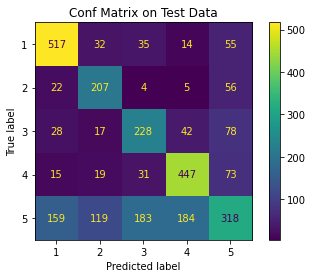

In [48]:
fit_score(MultinomialNB(), CountVectorizer())

### LogReg with TFIDF and LSA

Model: LogisticRegression(max_iter=1000, n_jobs=-1)
Vectorizer: TfidfVectorizer(max_features=5000)
Train accuracy: 64.8%
Test accuracy: 60.7%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.73      0.77      0.75       653
           2       0.62      0.44      0.51       294
           3       0.56      0.42      0.48       393
           4       0.69      0.67      0.68       585
           5       0.50      0.59      0.54       963

    accuracy                           0.61      2888
   macro avg       0.62      0.58      0.59      2888
weighted avg       0.61      0.61      0.60      2888



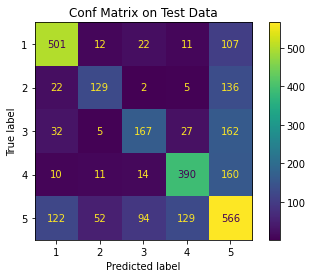

In [111]:
fit_score(LogisticRegression(max_iter=1000, n_jobs=-1), TfidfVectorizer(max_features=5000), lsa=True, lsa_components=500)

### DecisionTree with CountVectorizer

Model: DecisionTreeClassifier()
Vectorizer: CountVectorizer()
Train accuracy: 82.1%
Test accuracy: 43.4%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.59      0.60      0.60       653
           2       0.34      0.38      0.36       294
           3       0.32      0.33      0.33       393
           4       0.52      0.54      0.53       585
           5       0.34      0.31      0.33       963

    accuracy                           0.43      2888
   macro avg       0.42      0.43      0.43      2888
weighted avg       0.43      0.43      0.43      2888



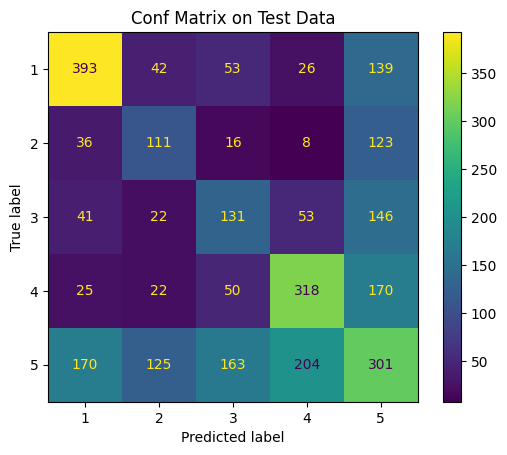

In [35]:
fit_score(DecisionTreeClassifier(), CountVectorizer())

### MultinomialNB with TfidfVectorizer

Model: MultinomialNB()
Vectorizer: TfidfVectorizer()
Train accuracy: 59.2%
Test accuracy: 52.3%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.73      0.64      0.68       653
           2       1.00      0.00      0.01       294
           3       0.41      0.02      0.03       393
           4       0.70      0.58      0.64       585
           5       0.41      0.77      0.53       963

    accuracy                           0.52      2888
   macro avg       0.65      0.40      0.38      2888
weighted avg       0.60      0.52      0.47      2888



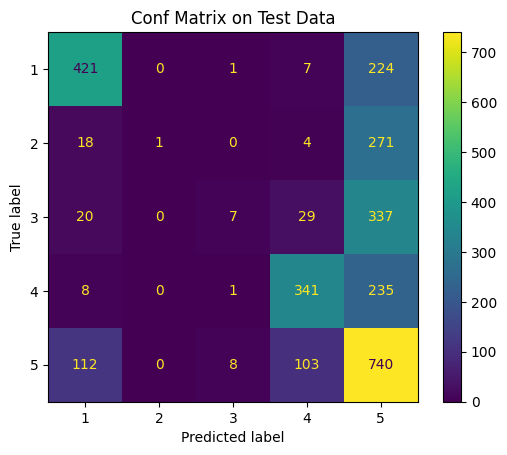

In [36]:
fit_score(MultinomialNB(), TfidfVectorizer())

### DecisionTree with TfidfVectorizer

Model: DecisionTreeClassifier()
Vectorizer: TfidfVectorizer()
Train accuracy: 82.1%
Test accuracy: 42.1%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.57      0.60      0.59       653
           2       0.35      0.35      0.35       294
           3       0.30      0.30      0.30       393
           4       0.51      0.54      0.52       585
           5       0.32      0.29      0.31       963

    accuracy                           0.42      2888
   macro avg       0.41      0.42      0.41      2888
weighted avg       0.42      0.42      0.42      2888



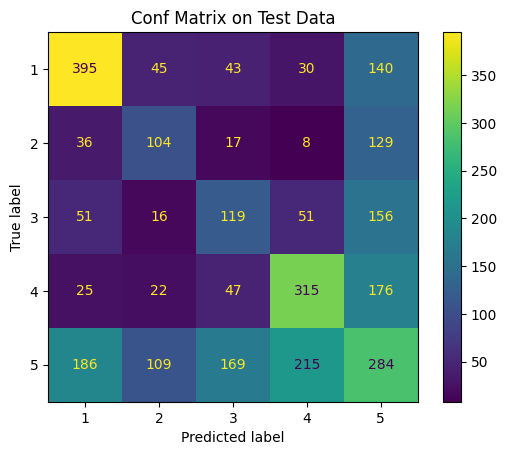

In [37]:
fit_score(DecisionTreeClassifier(), TfidfVectorizer())

### DecisionTree with HashingVectorizer

Model: DecisionTreeClassifier()
Vectorizer: HashingVectorizer()
Train accuracy: 82.1%
Test accuracy: 42.9%


Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.57      0.61      0.59       653
           2       0.36      0.38      0.37       294
           3       0.32      0.32      0.32       393
           4       0.50      0.52      0.51       585
           5       0.34      0.31      0.32       963

    accuracy                           0.43      2888
   macro avg       0.42      0.43      0.42      2888
weighted avg       0.42      0.43      0.43      2888



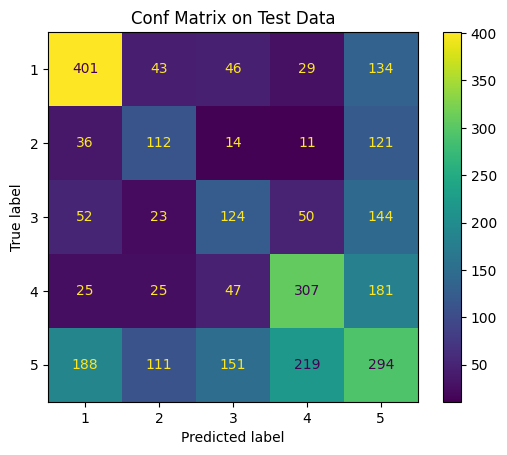

In [39]:
fit_score(DecisionTreeClassifier(), HashingVectorizer())

- Best simple model was __MultinomialNB, CountVectorizer__ with a 59.5% test acc